In [42]:
import os
from scipy.io import loadmat
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# the following import is required for matplotlib < 3.2:
from mpl_toolkits.mplot3d import Axes3D  # noqa
import mne


In [43]:
# load raw
subject_id = 1
before_or_after = 'before'
raw_path = os.path.join('..', '..', 'data', str(subject_id), 'raw_' + before_or_after + '.fif')
raw = mne.io.read_raw_fif(raw_path, preload=True)
# raw.plot()

Opening raw data file ..\..\data\1\raw_before.fif...
    Range : 0 ... 647763 =      0.000 ...   539.803 secs
Ready.
Reading 0 ... 647763  =      0.000 ...   539.803 secs...


C:\Users\Tianyi Zheng\AppData\Local\Temp\ipykernel_16160\2994435007.py:5: RuntimeWarning: This filename (..\..\data\1\raw_before.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(raw_path, preload=True)


Effective window size : 0.213 (s)
NOTE: plot_raw_psd() is a legacy function. New code should use Raw.compute_psd().plot().
NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 1.707 (s)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished
c:\ProgramData\anaconda3\envs\mne_office\lib\site-packages\mne\viz\utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


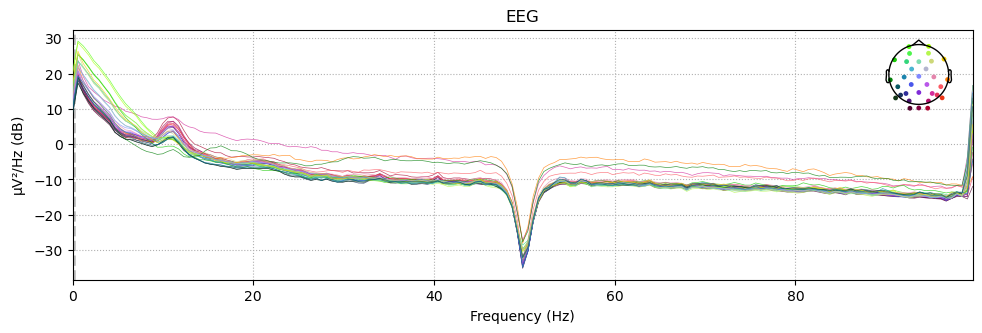

In [44]:
# check psd
psd_obj = raw.compute_psd(fmax=100)
mne.viz.plot_raw_psd(raw, fmax=100, spatial_colors=True)

In [45]:
# # filtering and resampling
# # Apply low-pass filter
# raw_filtered = raw.copy().filter(l_freq=None, h_freq=50)

# # Resample the data
# sfreq = 600
# raw_resampled = raw_filtered.copy().resample(sfreq=sfreq)

# # Plot the power spectral density (PSD) of the original data
# psd_obj = raw.compute_psd(fmax=100)
# mne.viz.plot_raw_psd(raw, fmax=100, spatial_colors=True)

# # Plot the PSD of the resampled data
# raw_resampled.plot_psd()
# psd_obj = raw_resampled.compute_psd(fmax=100)
# mne.viz.plot_raw_psd(raw_resampled, fmax=100, spatial_colors=True)

Fitting ICA to data using 32 channels (please be patient, this may take a while)
Selecting by number: 32 components
Fitting ICA took 32.4s.
{'eeg': 1.0}


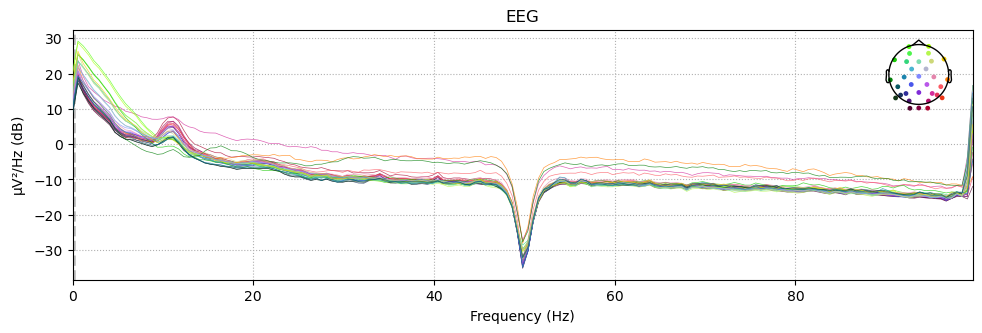

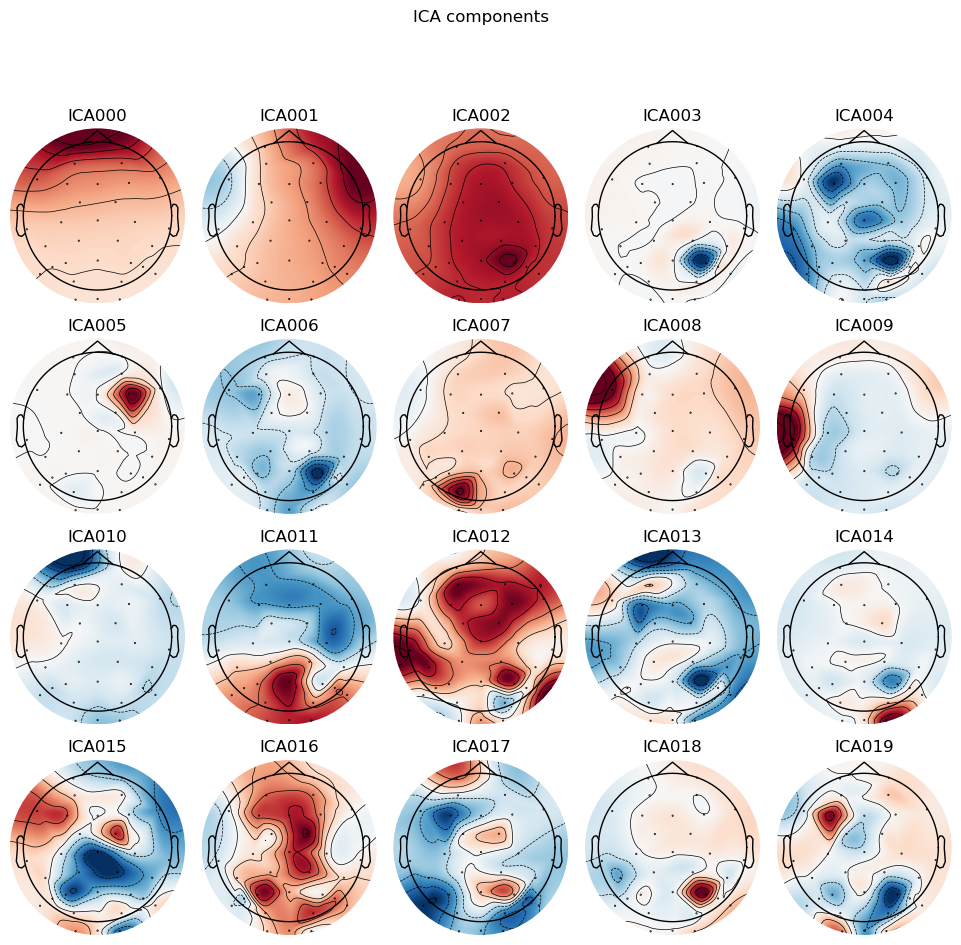

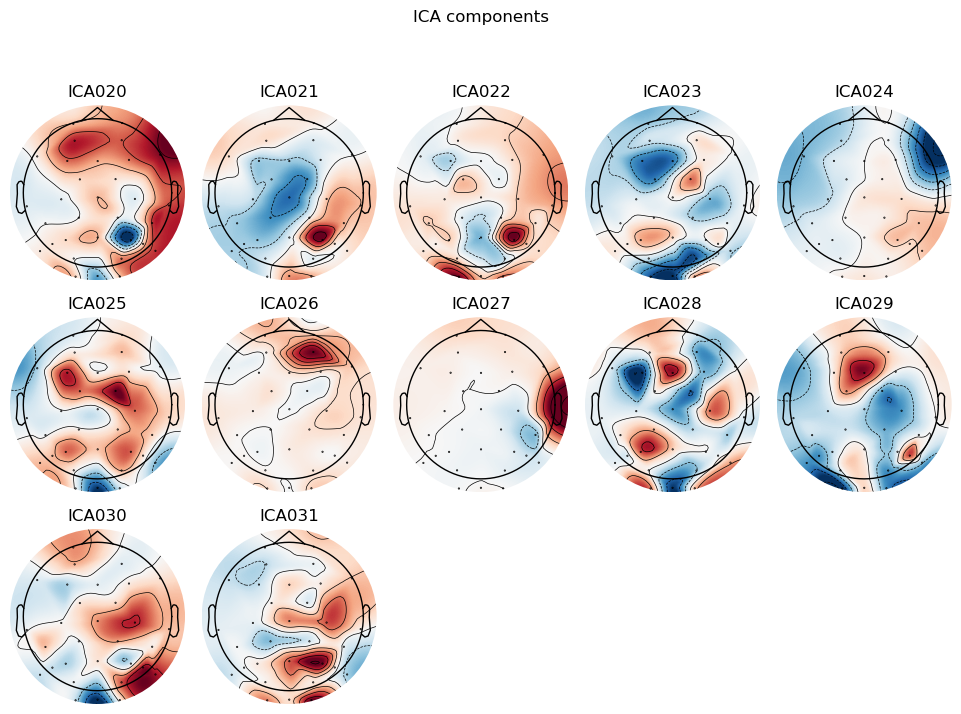

Creating RawArray with float64 data, n_channels=32, n_times=647764
    Range : 0 ... 647763 =      0.000 ...   539.803 secs
Ready.


In [46]:
# ica
raw_filtered = raw.copy() # raw already filtered
n_components = 32  # Number of ICA components (adjust as needed)
ica = mne.preprocessing.ICA(n_components=n_components, random_state=97, method='picard')
ica.fit(raw_filtered)
# Extract explained variance of all components
explained_var = ica.get_explained_variance_ratio(raw_filtered)
print(explained_var)
ica.plot_components()
ica.plot_sources(raw_filtered)

In [47]:
# ica.plot_sources(raw_filtered)

Creating RawArray with float64 data, n_channels=32, n_times=647764
    Range : 0 ... 647763 =      0.000 ...   539.803 secs
Ready.


120 events found
Event IDs: [1]
Not setting metadata
120 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 120 events and 6097 original time points ...
1 bad epochs dropped
Applying ICA to Epochs instance
    Transforming to ICA space (32 components)
    Zeroing out 0 ICA components
    Projecting back using 32 PCA components


C:\Users\Tianyi Zheng\AppData\Local\Temp\ipykernel_16160\1573317896.py:12: RuntimeWarning: The data you passed to ICA.apply() was baseline-corrected. Please note that ICA can introduce DC shifts, therefore you may wish to consider baseline-correcting the cleaned data again.
  ica_epochs = ica.apply(epochs.copy(), exclude=ica.exclude)


    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
119 matching events found
No baseline correction applied
0 projection items activated


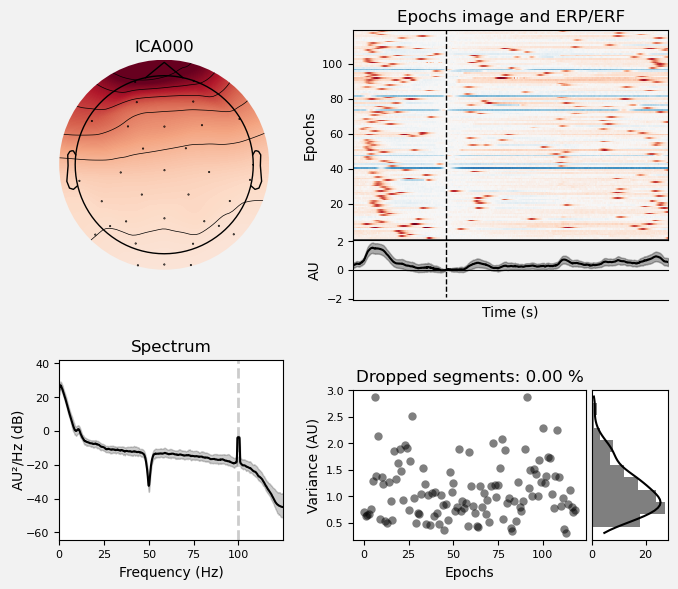

    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
119 matching events found
No baseline correction applied
0 projection items activated


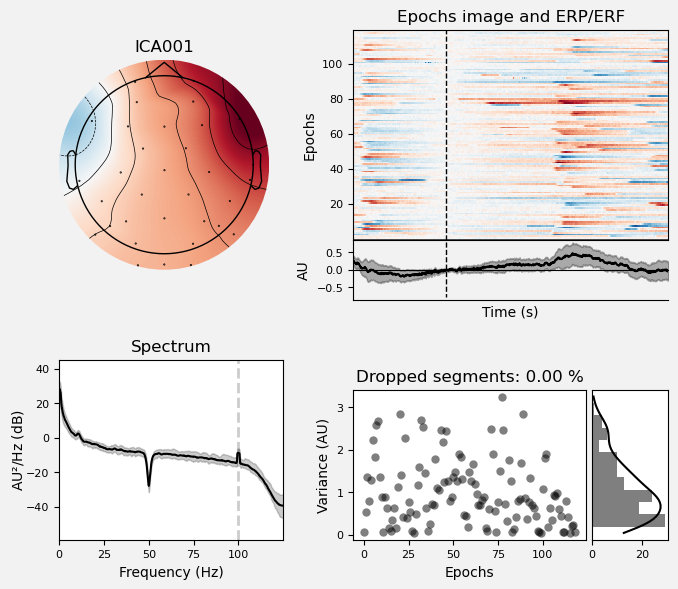

    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
119 matching events found
No baseline correction applied
0 projection items activated


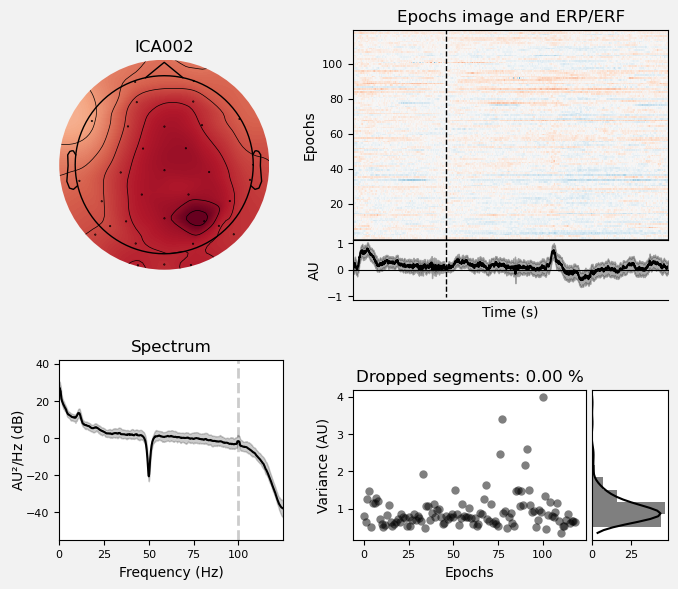

    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
119 matching events found
No baseline correction applied
0 projection items activated


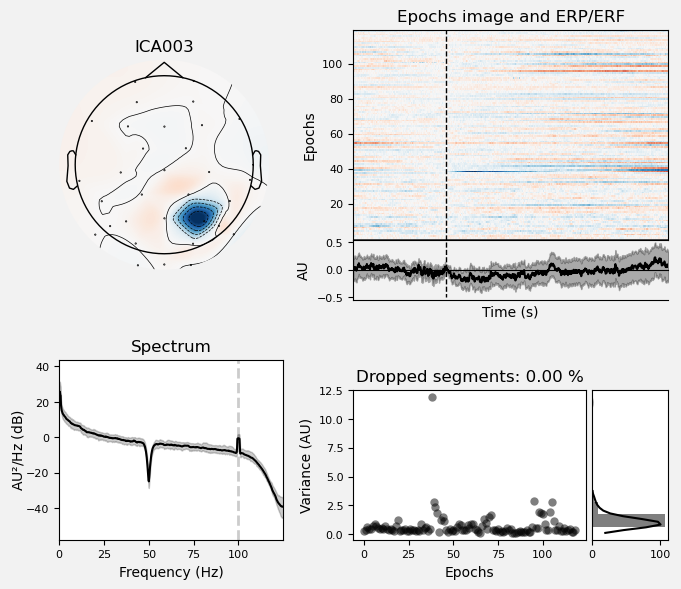

    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
119 matching events found
No baseline correction applied
0 projection items activated


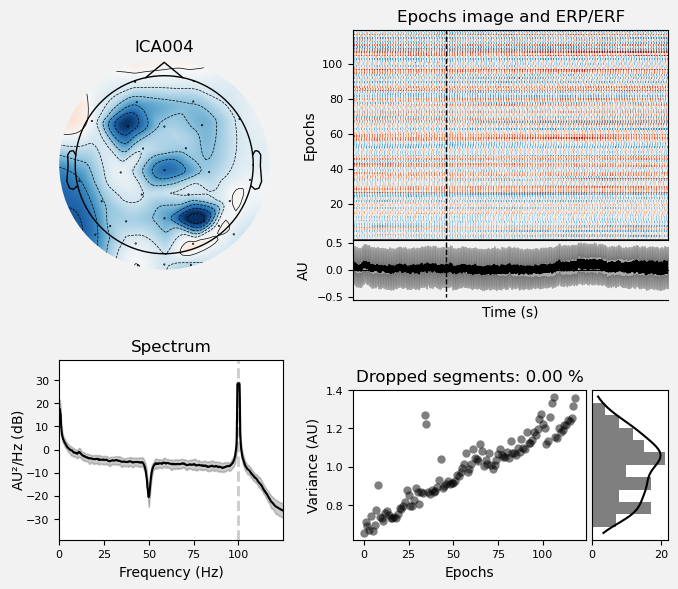

    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
119 matching events found
No baseline correction applied
0 projection items activated


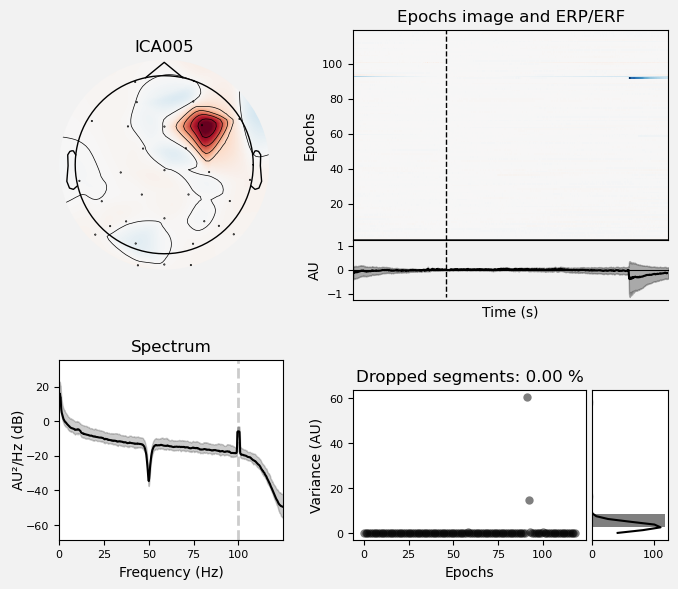

    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
119 matching events found
No baseline correction applied
0 projection items activated


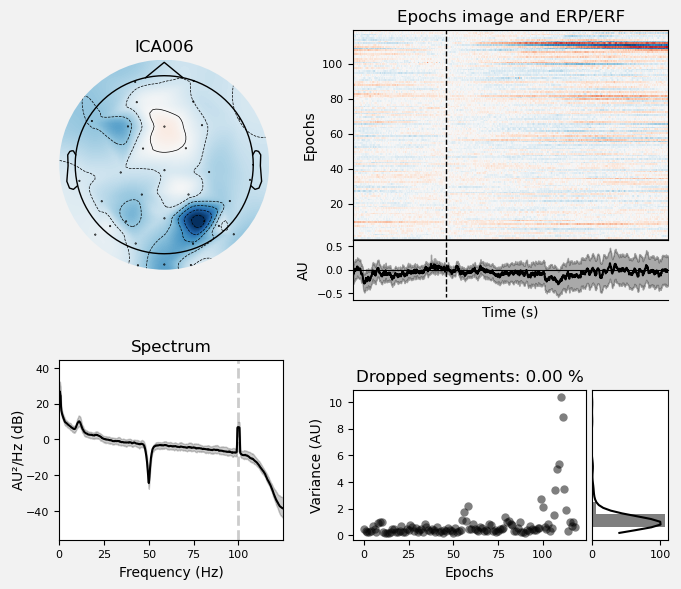

    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
119 matching events found
No baseline correction applied
0 projection items activated


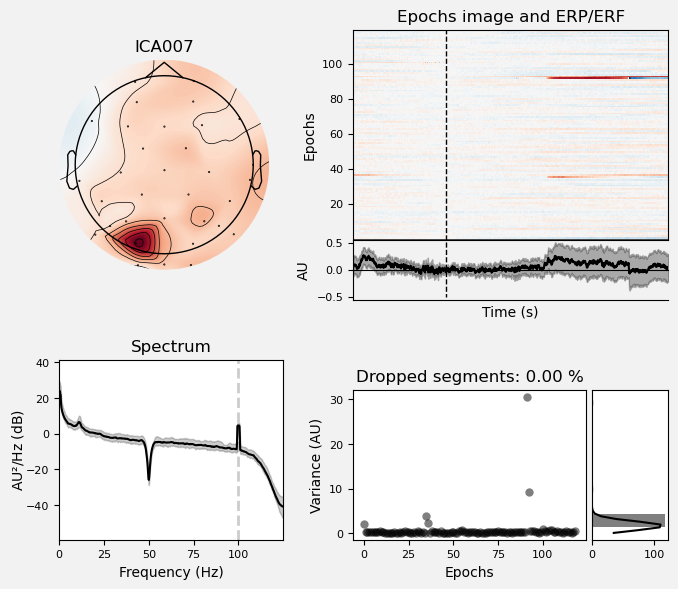

    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
119 matching events found
No baseline correction applied
0 projection items activated


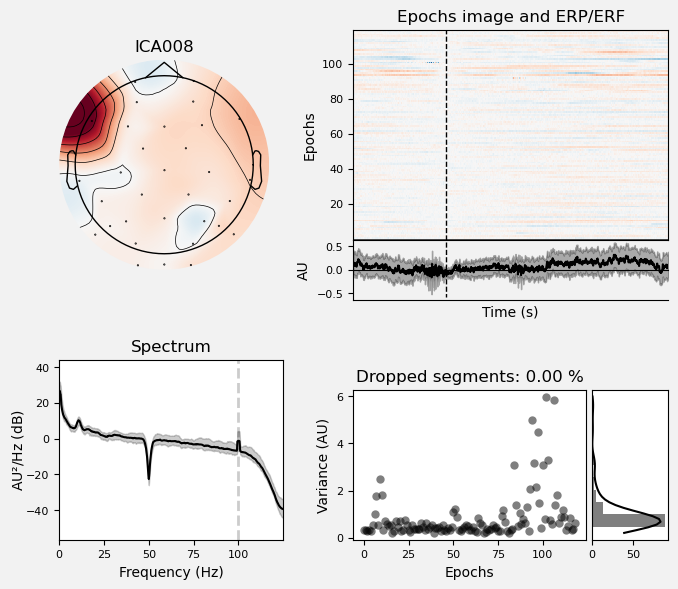

    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
119 matching events found
No baseline correction applied
0 projection items activated


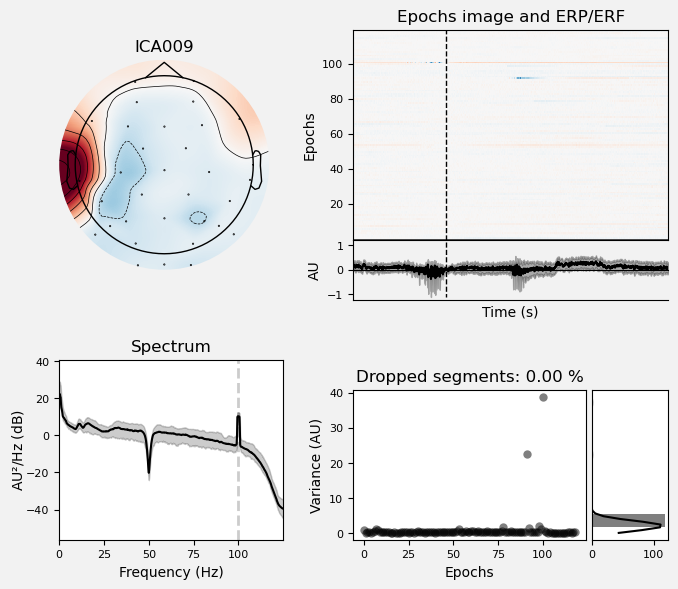

    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
119 matching events found
No baseline correction applied
0 projection items activated


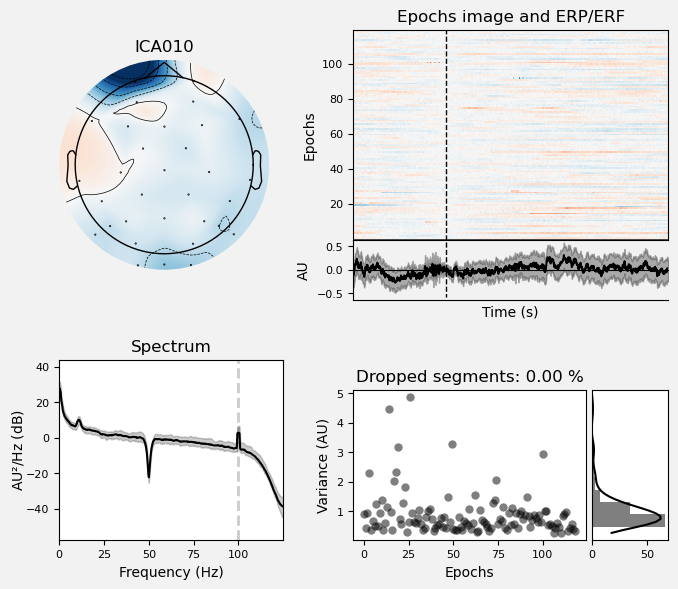

    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
119 matching events found
No baseline correction applied
0 projection items activated


c:\ProgramData\anaconda3\envs\mne_office\lib\site-packages\scipy\stats\_distn_infrastructure.py:2351: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
c:\ProgramData\anaconda3\envs\mne_office\lib\site-packages\scipy\stats\_distn_infrastructure.py:2352: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


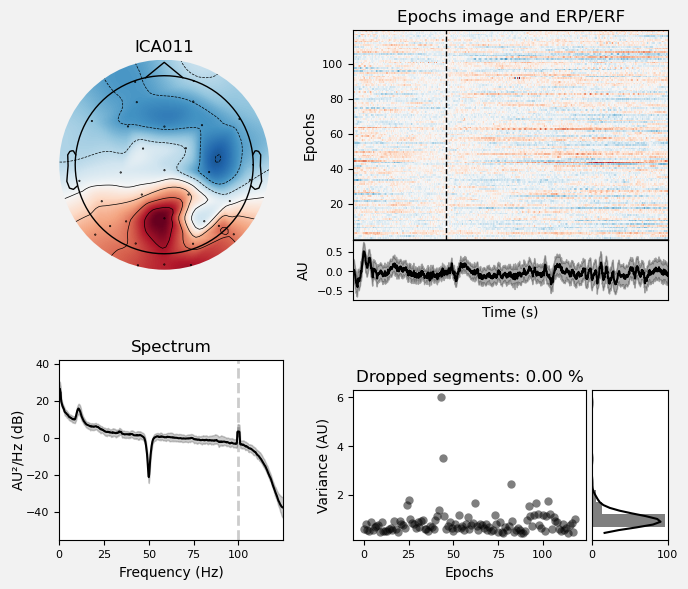

    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
119 matching events found
No baseline correction applied
0 projection items activated


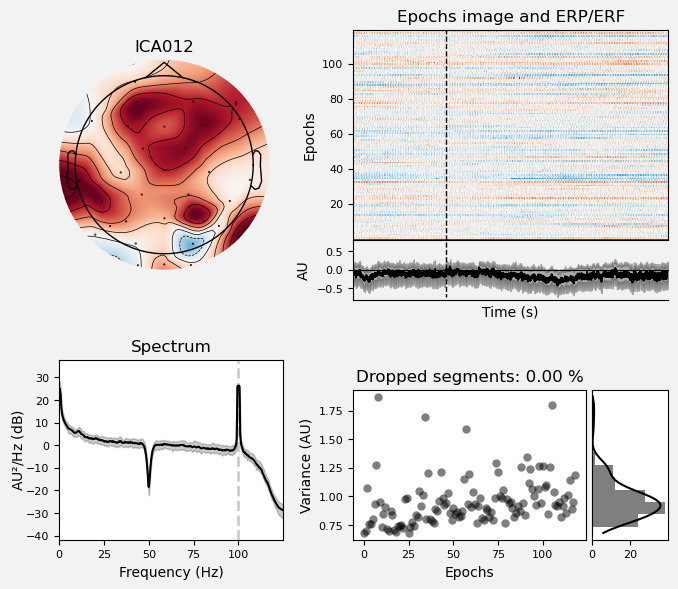

    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
119 matching events found
No baseline correction applied
0 projection items activated


c:\ProgramData\anaconda3\envs\mne_office\lib\site-packages\scipy\stats\_distn_infrastructure.py:2351: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
c:\ProgramData\anaconda3\envs\mne_office\lib\site-packages\scipy\stats\_distn_infrastructure.py:2352: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


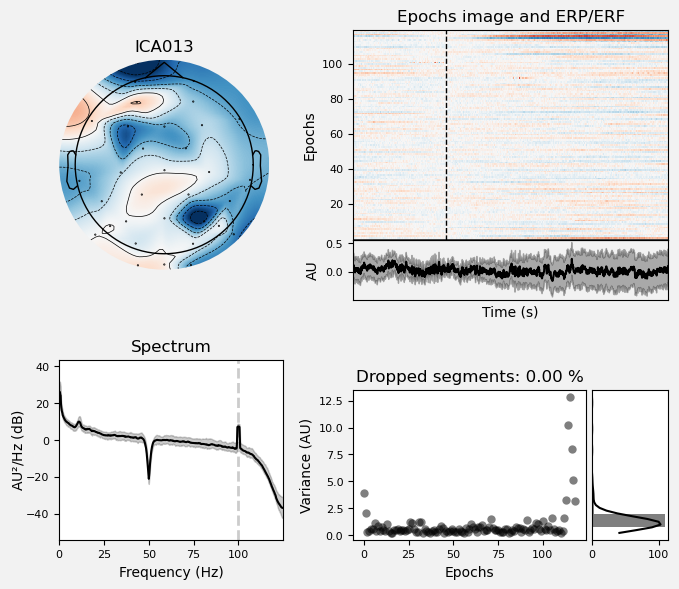

    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
119 matching events found
No baseline correction applied
0 projection items activated


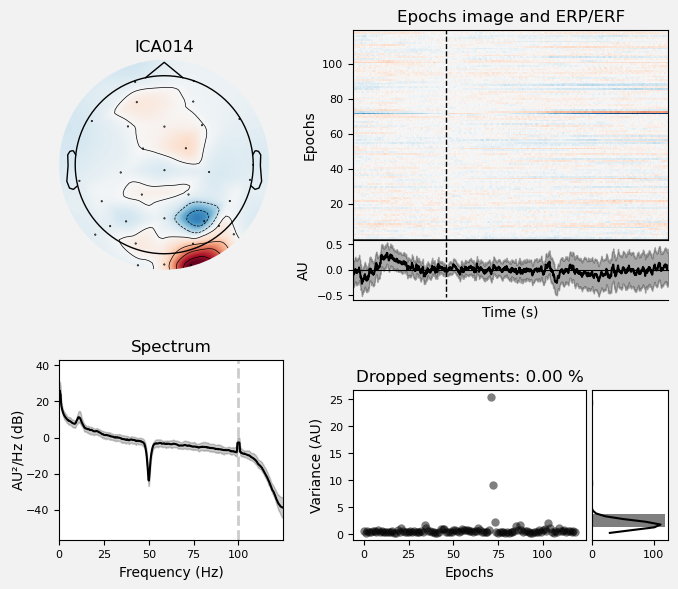

    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
119 matching events found
No baseline correction applied
0 projection items activated


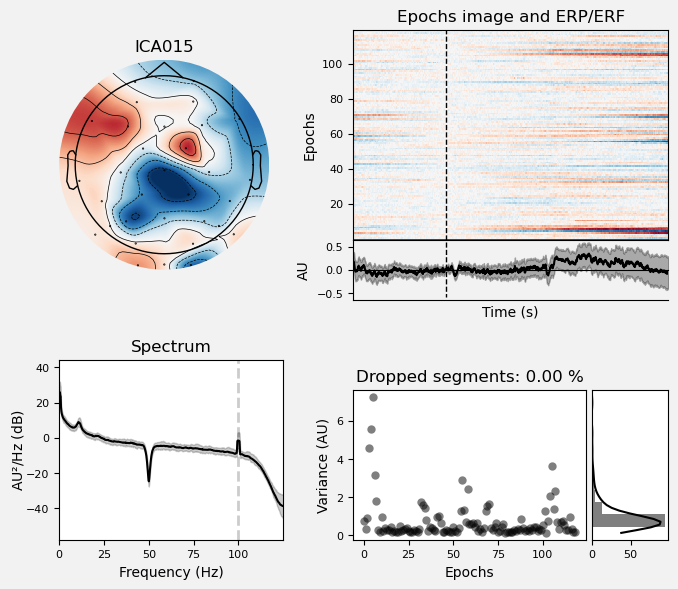

    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
119 matching events found
No baseline correction applied
0 projection items activated


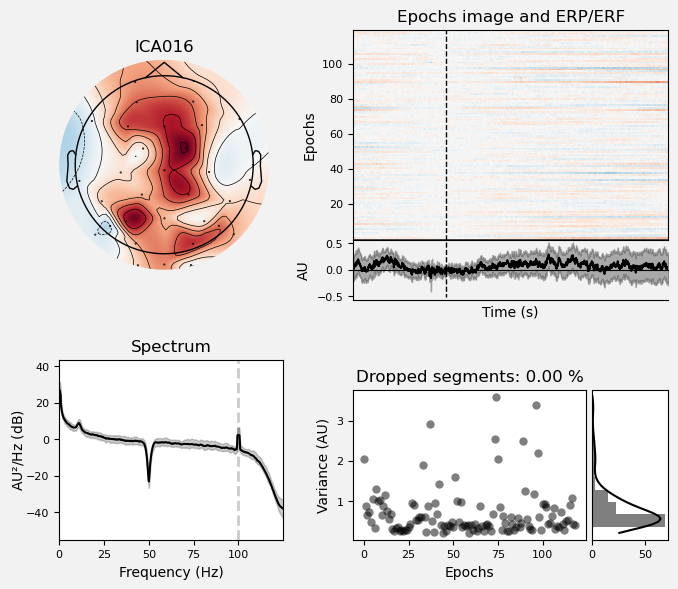

    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
119 matching events found
No baseline correction applied
0 projection items activated


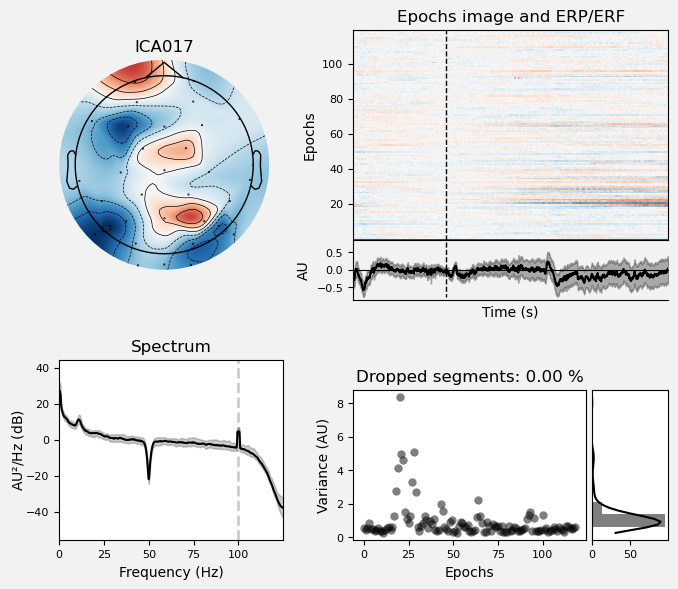

    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
119 matching events found
No baseline correction applied
0 projection items activated


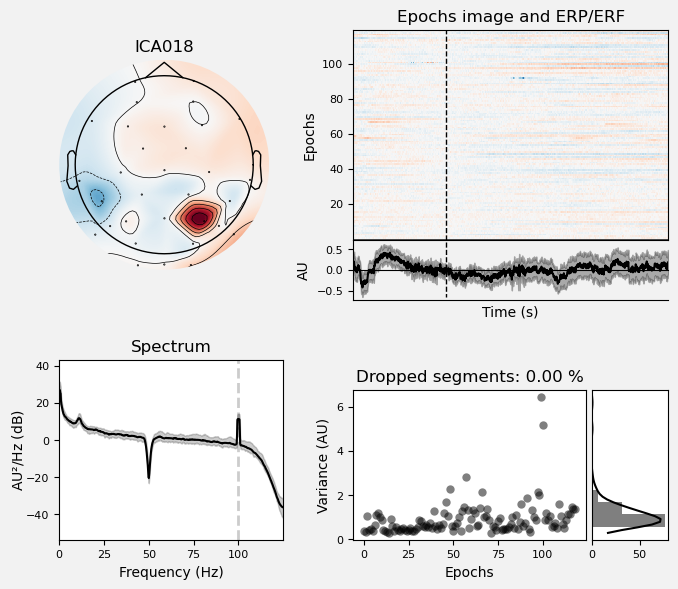

    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
119 matching events found
No baseline correction applied
0 projection items activated


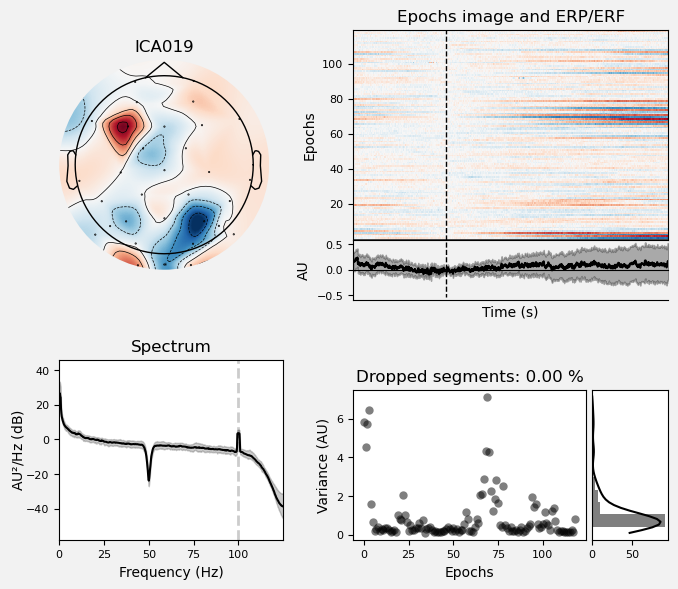

    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
119 matching events found
No baseline correction applied
0 projection items activated


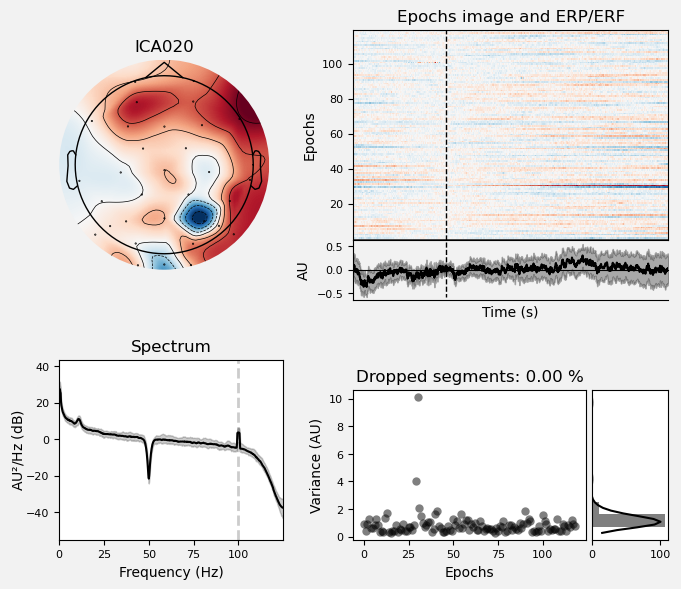

    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
119 matching events found
No baseline correction applied
0 projection items activated


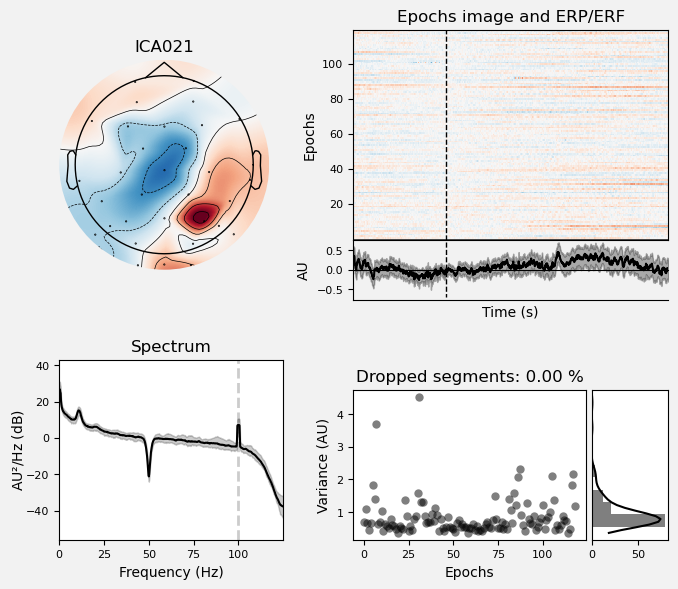

    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
119 matching events found
No baseline correction applied
0 projection items activated


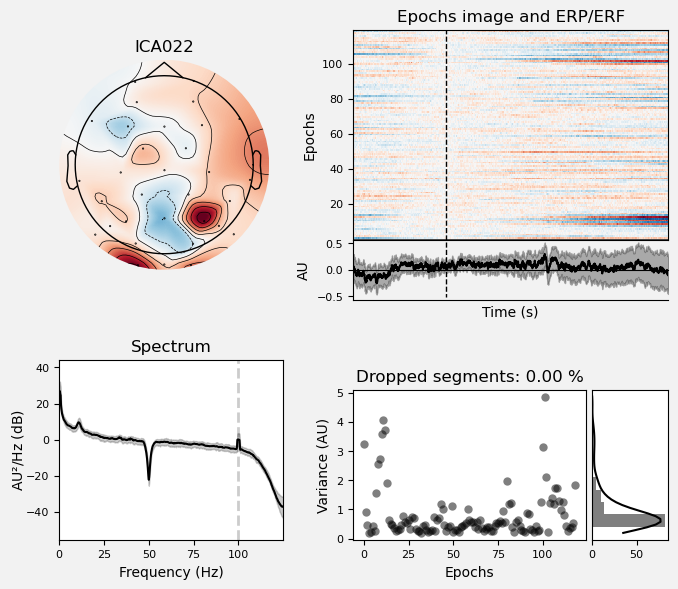

    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
119 matching events found
No baseline correction applied
0 projection items activated


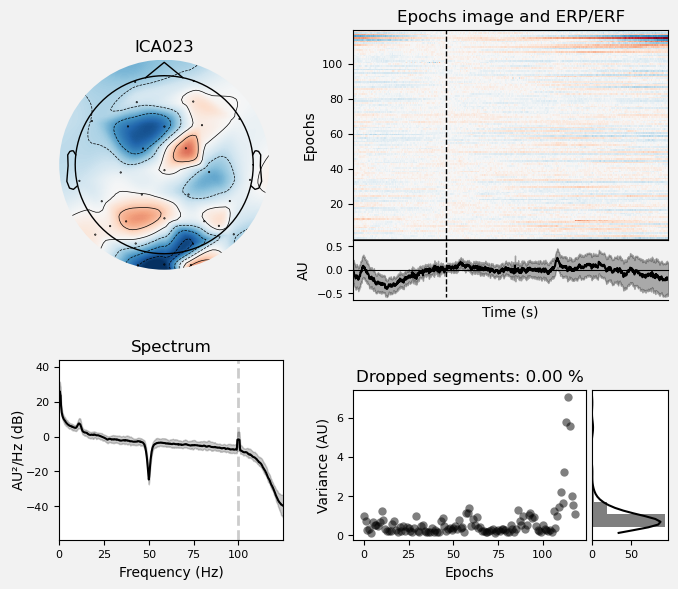

    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
119 matching events found
No baseline correction applied
0 projection items activated


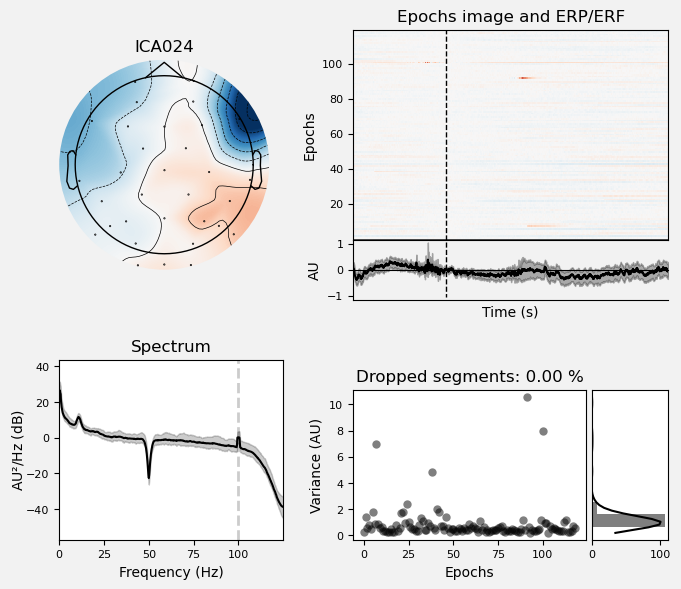

    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
119 matching events found
No baseline correction applied
0 projection items activated


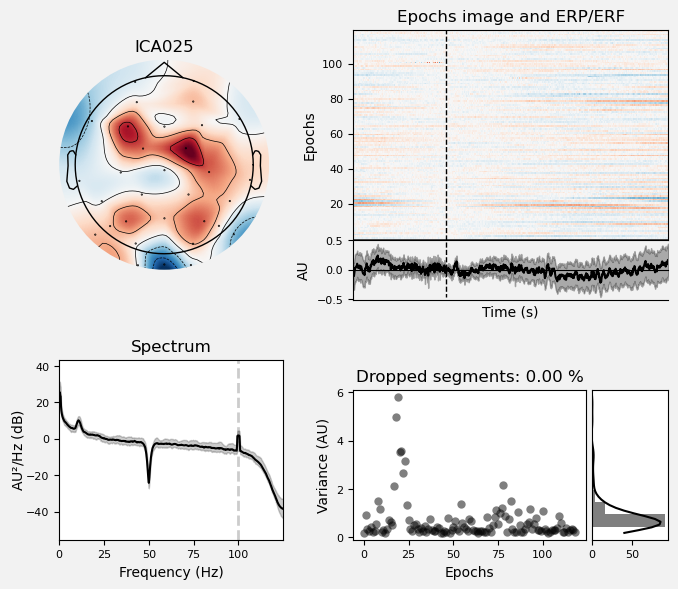

    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
119 matching events found
No baseline correction applied
0 projection items activated


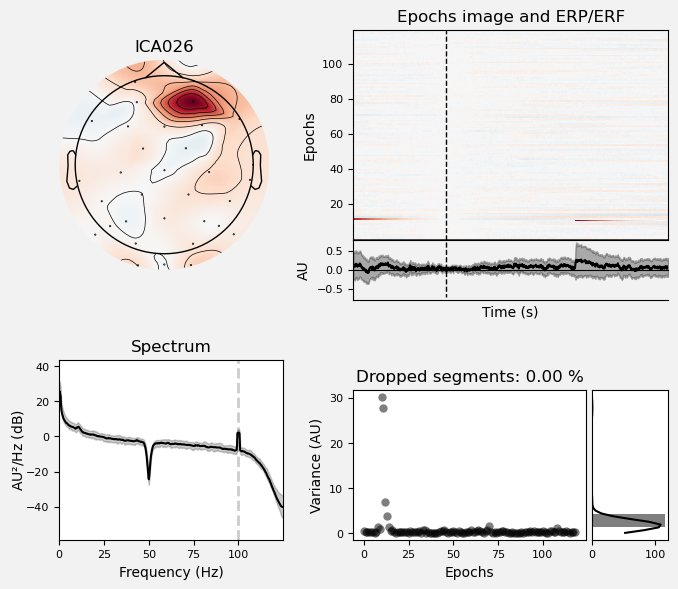

    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
119 matching events found
No baseline correction applied
0 projection items activated


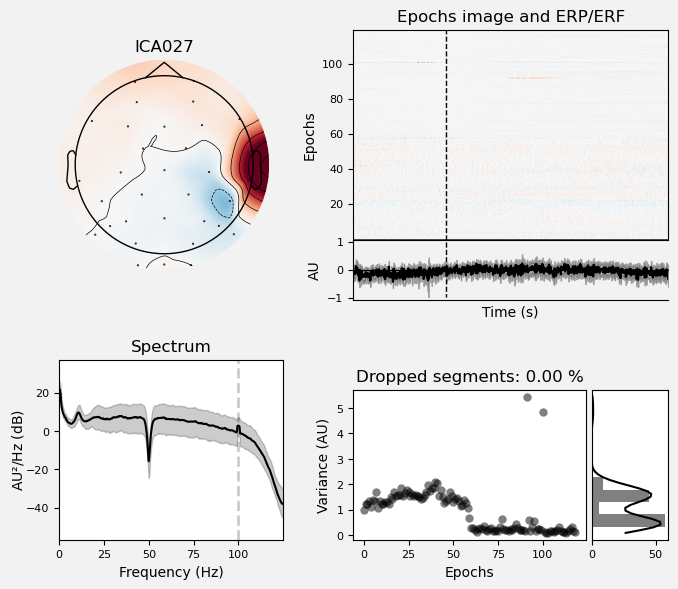

    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
119 matching events found
No baseline correction applied
0 projection items activated


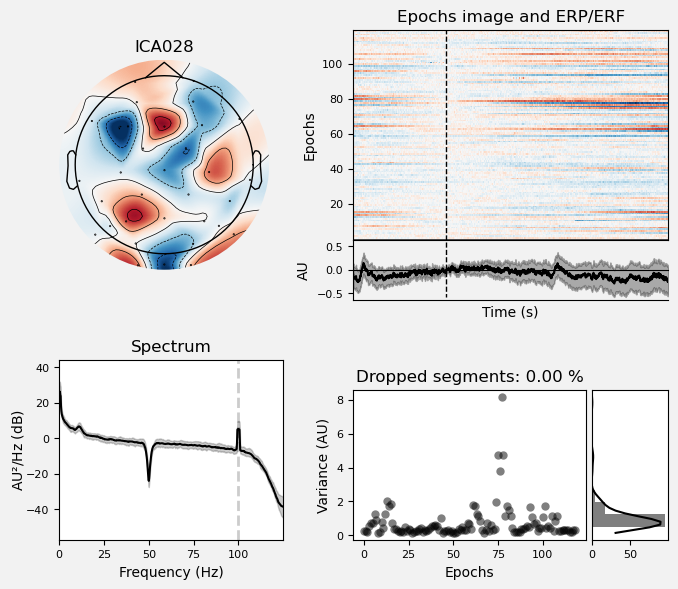

    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
119 matching events found
No baseline correction applied
0 projection items activated


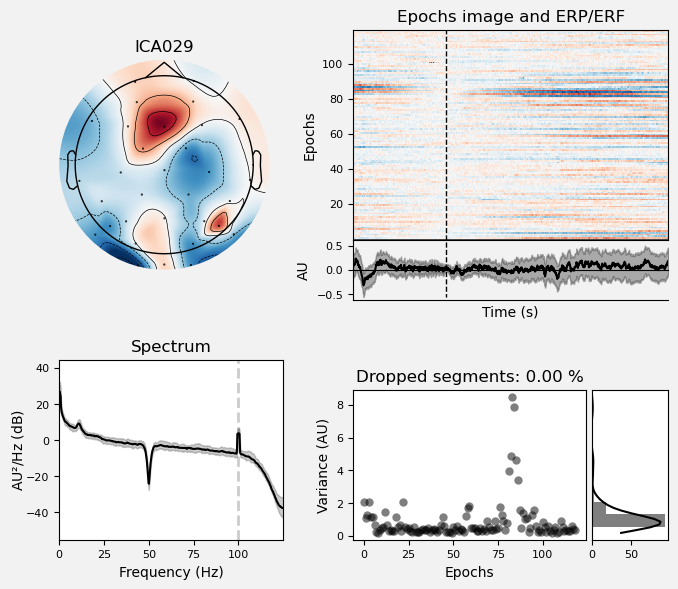

    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
119 matching events found
No baseline correction applied
0 projection items activated


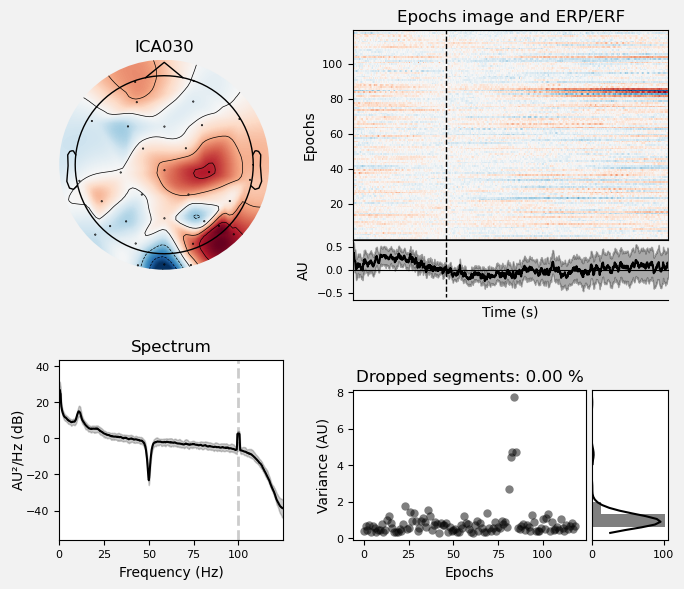

    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
119 matching events found
No baseline correction applied
0 projection items activated


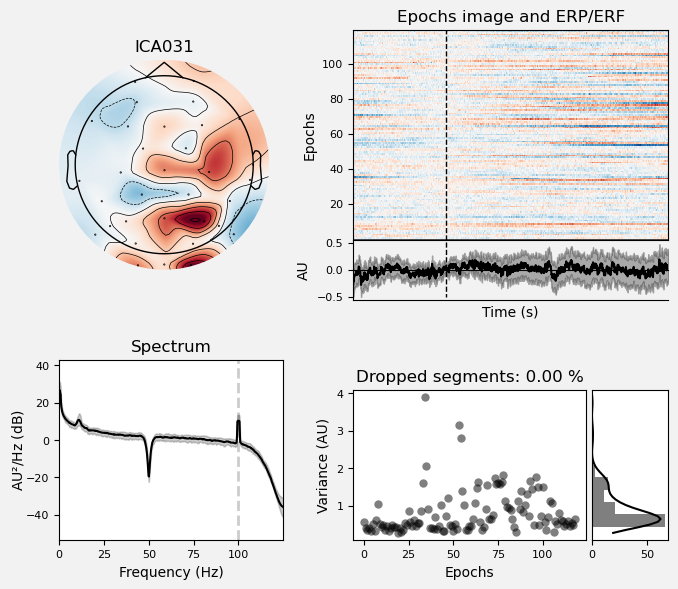

In [51]:
# plot properties based on epochs
# Find events related to the 'fixation' stim channel
stim_channel_name = 'fixation'
event_id = {'fixation': 1}
events = mne.find_events(raw, stim_channel=stim_channel_name, min_duration=1/raw.info['sfreq'])

# Create epochs
tmin, tmax = -1.5, 3.58  # Define the time range of epochs 3.583s-5.05s
epochs = mne.Epochs(raw, events, event_id=event_id, tmin=tmin, tmax=tmax, baseline=(0, 0), preload=True)

# Apply ICA to the epochs
ica_epochs = ica.apply(epochs.copy(), exclude=ica.exclude)

# Plot properties for each component using segments based on epochs
for idx in range(ica.n_components_):
    ica.plot_properties(ica_epochs, picks=idx)

In [49]:
# plot overlay
# ica.plot_overlay(raw, exclude=[1,2,3,4], picks='eeg')

In [50]:
ica.exclude = [0, 2, 5, 31]  # Replace with the indices of the components you want to exclude
raw_ica_applied = raw.copy()
ica.apply(raw_ica_applied)
raw.plot()
raw_ica_applied.plot()

Applying ICA to Raw instance
    Transforming to ICA space (32 components)
    Zeroing out 4 ICA components
    Projecting back using 32 PCA components


Channels marked as bad:
none
Channels marked as bad:
none
